In [ ]:
# 安裝套件及預先訓練的模型
!pip install -U spacy


In [ ]:
# 小型的英文模型

!python -m spacy download en_core_web_sm 


In [7]:
# 小型的中文模型
!python -m spacy download zh_core_web_sm 

     ---------------------------------------- 48.5/48.5 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 2.4/2.4 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


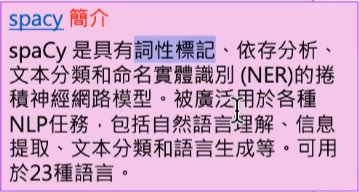

In [4]:
from IPython.display import Image
Image("img/13.jpg")

In [5]:
import spacy


In [8]:
# 載入模型
nlp_zh = spacy.load('zh_core_web_sm')

# 對中文語句進行解析
doc = nlp_zh('台灣是一個位於亞洲東部的島嶼國家。')

In [9]:
for token in doc:
    # token.text表示標記的原始文字，token.pos_表示標記的詞性（part-of-speech），token.dep_表示標記與其他標記之間的句法依存關係
    #print(token.text, token.pos_, token.dep_)
    print(token.text, token.pos_, token.tag_, token.has_vector, token.vector_norm, token.is_oov)

台灣 NOUN NN True 10.789683 True
是 VERB VC True 11.355757 True
一 NUM CD True 11.8724785 True
個 NUM M True 12.690992 True
位於 NOUN NN True 10.173786 True
亞洲 VERB VV True 11.515832 True
東部 VERB VV True 10.205804 True
的 PART DEC True 13.789071 True
島嶼 NOUN NN True 13.087203 True
國家 NOUN NN True 11.206824 True
。 PUNCT PU True 13.656205 True


In [10]:
import pandas as pd

columns=['詞', '詞類', '詞性標註', '單詞依存關係', '是否為純字母組成', '是否為停用詞']
dim = list(map(lambda x: [x.text, x.pos_, x.tag_, x.dep_, x.is_alpha, x.is_stop], doc))

df = pd.DataFrame(dim, columns=columns)
df

,詞,詞類,詞性標註,單詞依存關係,是否為純字母組成,是否為停用詞
0,台灣,NOUN,NN,nsubj,True,False
1,是,VERB,VC,cop,True,True
2,一,NUM,CD,nummod,True,True
3,個,NUM,M,mark:clf,True,False
4,位於,NOUN,NN,compound:nn,True,False
5,亞洲,VERB,VV,acl,True,False
6,東部,VERB,VV,compound:vc,True,False
7,的,PART,DEC,mark,True,True
8,島嶼,NOUN,NN,compound:nn,True,False
9,國家,NOUN,NN,ROOT,True,False


In [11]:
# 遍歷doc中的每個Token
for token in doc:
    print(token.text)

台灣
是
一
個
位於
亞洲
東部
的
島嶼
國家
。


In [12]:
# 新增自定義詞彙
nlp_zh.tokenizer.pkuseg_update_user_dict(["島嶼國家","亞洲東部"])

doc = nlp_zh("台灣是一個位於亞洲東部的島嶼國家。")

for token in doc:
    print(token.text)


台灣
是
一
個
位於
亞洲東部
的
島嶼國家
。


In [15]:
# 遍歷分詞後的每個詞語
for token in doc:
    # 輸出詞語的文字內容、是否有對應的向量表示、向量範數和是否為未登入詞（Out-of-vocabulary，即不在詞向量詞典中的詞）
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

台灣 True 10.789683 True
是 True 11.372706 True
一 True 11.607414 True
個 True 12.142111 True
位於 True 10.156819 True
亞洲東部 True 10.949875 True
的 True 12.323635 True
島嶼國家 True 10.755456 True
。 True 12.903308 True


In [13]:
# NER實體識別
from spacy import displacy #----->圖形化,跑10秒即可

displacy.serve(doc, style="dep",auto_select_port=True)#, port=5500


d:\anaconda\lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [17]:

displacy.render(doc, style="ent", jupyter=True)